**Importing the Dependencies**

In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 907.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(0)   # Creating Reproduceable Seed
from tensorflow.keras import datasets   # Importing the Datasets
from tensorflow.keras.utils import to_categorical   # For one-hot encoding

**Image Data Preparation**

In [3]:
# Loading the datasets
# MNIST Handwritten Digits
# CIFAR-10

(x_train_digits, y_train_digits), (x_test_digits, y_test_digits) = datasets.mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = datasets.cifar10.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Shape of the datasets
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28) (28, 28)
(32, 32, 3) (32, 32, 3)


**70,000 Grayscale Images --> MNIST Handwritten Dataset**

**60,000 RGB Images --> CIFAR-10**

In [ ]:
# Create a function to convert the CIFAR to Grayscale and Resize to 28,28
'''
def preprocess_images(images, size=(28, 28)):
    gray_images = []
    for img in images:
        # Convert RGB to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Resize the image
        resized = cv2.resize(gray, size)
        gray_images.append(resized)
    return np.array(gray_images)

x_train_cifar = preprocess_images(x_train_cifar)
x_test_cifar = preprocess_images(x_test_cifar)
'''

In [6]:
# Defining the Classes
handwritten_digits = {
                        0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'
}

cifar = {
          0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'
}

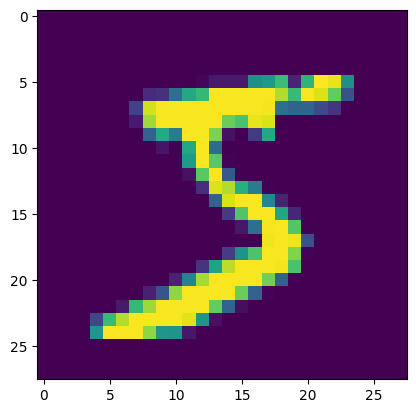

Label: 5


In [7]:
# Visualizing some samples of the datasets
plt.imshow(x_train_digits[0])
plt.show()
cv2_imshow(x_train_digits[0])
print('Label:', y_train_digits[0])

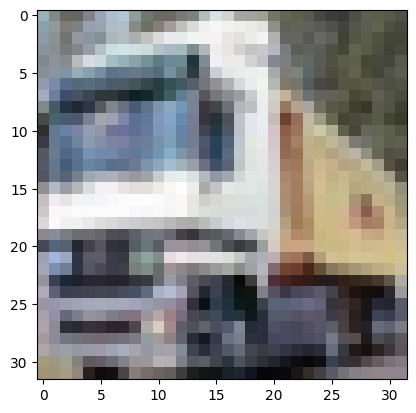

[9]
Label: truck


In [8]:
plt.imshow(x_train_cifar[1])
plt.show()
print(y_train_cifar[1])
print('Label:', cifar[9])

In [9]:
# Normalizing the dataset from 0 to 1
#Digits
x_train_digits = x_train_digits.astype('float32') / 255.0
x_test_digits = x_test_digits.astype('float32') / 255.0

#Cifar
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

In [10]:
print(x_train_digits[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(x_train_cifar[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [12]:
# Checking the shape
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28) (28, 28)
(32, 32, 3) (32, 32, 3)


In [13]:
# Reshaping the image dataset digits
x_train_digits = x_train_digits.reshape(-1, 28, 28, 1)
x_test_digits = x_test_digits.reshape(-1, 28, 28, 1)

In [14]:
# Checking the shape again
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28, 1) (28, 28, 1)
(32, 32, 3) (32, 32, 3)


In [15]:
# One-Hot Label Encoding
#Digits
y_train_digits = to_categorical(y_train_digits, num_classes=10)
y_test_digits = to_categorical(y_test_digits, num_classes=10)

#Cifar
y_train_cifar = to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = to_categorical(y_test_cifar, num_classes=10)

In [16]:
print(y_train_digits[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
print(y_train_cifar[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:
# Checking all Image Dataset Labels
print(np.unique(y_train_digits))
print(np.unique(y_train_cifar))

[0. 1.]
[0. 1.]


In [19]:
# Checking again the image dataset shape
print(x_train_digits.shape, x_test_digits.shape)
print(x_train_cifar.shape, x_test_cifar.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(50000, 32, 32, 3) (10000, 32, 32, 3)


# **ReLu Activation Function**

## **Training the Model using MNIST Handwritten Digits Dataset**

**Building the Model/Shallow Neural Network - Grayscale Digits - ReLu**

In [ ]:
# Defining the no. of layers, neurons and activation function of each layer
model_relu_digits = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28,1)),
                              tf.keras.layers.Dense(32, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
# Compiling the Model - Optimizer, Loss and Evaluation Metric
model_relu_digits.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy', 'precision', 'recall', 'f1_score']
)

In [22]:
# Training the Model - Digits
history_relu_digits = model_relu_digits.fit(x_train_digits, y_train_digits, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.7763 - f1_score: 0.7708 - loss: 0.7126 - precision: 0.8975 - recall: 0.6686 - val_accuracy: 0.9540 - val_f1_score: 0.9534 - val_loss: 0.1630 - val_precision: 0.9679 - val_recall: 0.9437
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9199 - f1_score: 0.9188 - loss: 0.2608 - precision: 0.9388 - recall: 0.9034 - val_accuracy: 0.9627 - val_f1_score: 0.9623 - val_loss: 0.1304 - val_precision: 0.9704 - val_recall: 0.9567
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9369 - f1_score: 0.9360 - loss: 0.2057 - precision: 0.9493 - recall: 0.9238 - val_accuracy: 0.9683 - val_f1_score: 0.9680 - val_loss: 0.1123 - val_precision: 0.9755 - val_recall: 0.9627
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9416 - f1_score: 0.9408 - loss: 0.1901 - precision: 0.9523 - recall: 0.9308 - val_accuracy: 0.9682 - val_f1_score: 0.9679 - val_loss: 0.1064 - val_precision: 0.9736 - 

**Evaluating the Model using Evaluation Metrics**

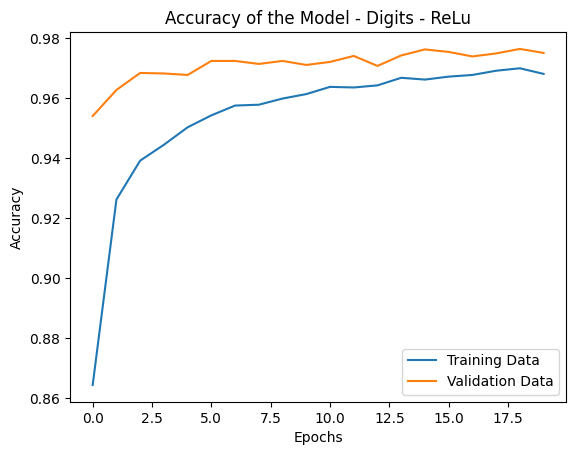

In [23]:
# Visualizing the Accuracies of the Model
relu_accuracy_digits = plt.figure()
plt.plot(history_relu_digits.history['accuracy'], label='Training Data')
plt.plot(history_relu_digits.history['val_accuracy'], label='Validation Data')
plt.title('Accuracy of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
relu_accuracy_digits.savefig('/content/ReLu Accuracy Plot - Digits.png')

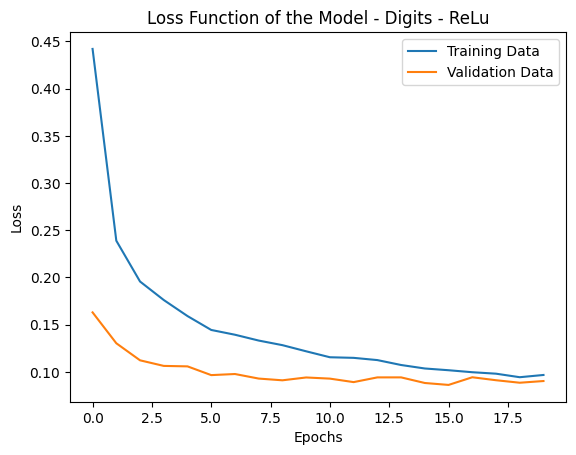

In [27]:
# Visualizing the Loss of the Model
relu_loss_digits = plt.figure()
plt.plot(history_relu_digits.history['loss'], label='Training Data')
plt.plot(history_relu_digits.history['val_loss'], label='Validation Data')
plt.title('Loss Function of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
relu_loss_digits.savefig('/content/ReLu Loss Function Plot - Digits.png')

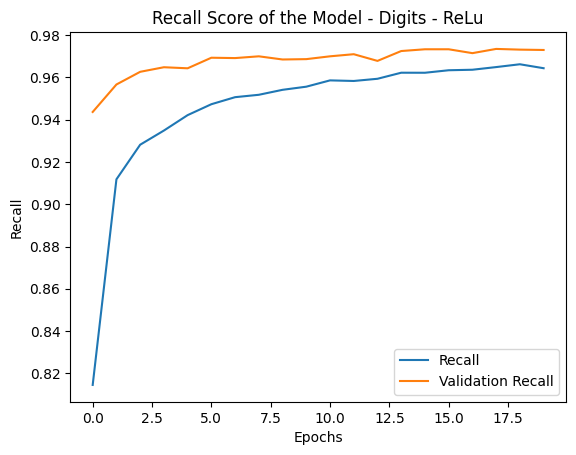

In [24]:
# Visualizing the Recall of the Model
relu_accuracy_digits = plt.figure()
plt.plot(history_relu_digits.history['recall'], label='Recall')
plt.plot(history_relu_digits.history['val_recall'], label='Validation Recall')
plt.title('Recall Score of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()
relu_accuracy_digits.savefig('/content/Recall Plot - Digits.png')

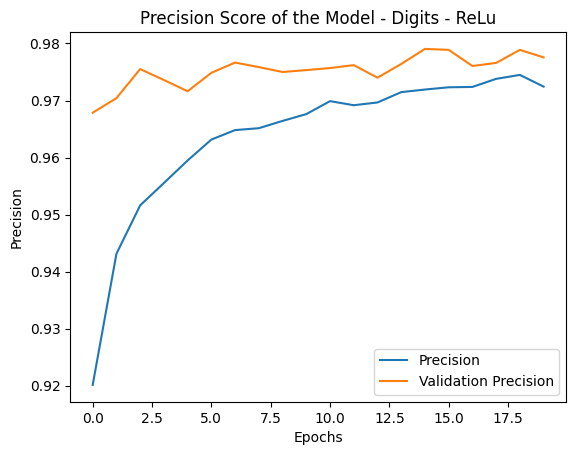

In [25]:
# Visualizing the Precision of the Model
relu_accuracy_digits = plt.figure()
plt.plot(history_relu_digits.history['precision'], label='Precision')
plt.plot(history_relu_digits.history['val_precision'], label='Validation Precision')
plt.title('Precision Score of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()
relu_accuracy_digits.savefig('/content/Precision Plot - Digits.png')

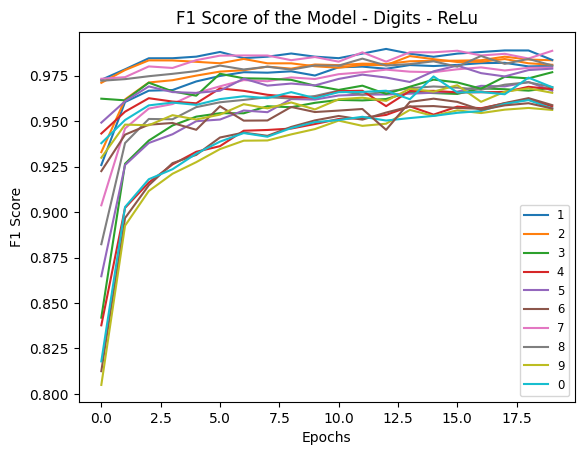

In [26]:
# Visualizing the F1 Score of the Model
relu_accuracy_digits = plt.figure()
plt.plot(history_relu_digits.history['f1_score'], label='F1 Score')
plt.plot(history_relu_digits.history['val_f1_score'], label='Validation F1 Score')
plt.title('F1 Score of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend('1234567890', fontsize='small')
plt.show()
relu_accuracy_digits.savefig('/content/F1-Score Plot - Digits.png')

In [28]:
# Evaluating the Model using Test Dataset
relu_digits_results = model_relu_digits.evaluate(x_test_digits, y_test_digits)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - f1_score: 0.9634 - loss: 0.1179 - precision: 0.9677 - recall: 0.9606


In [29]:
loss_relu_digits = relu_digits_results[0]
accuracy_relu_digits = relu_digits_results[1]

In [30]:
print(loss_relu_digits)
print(accuracy_relu_digits)

0.10689867287874222
0.9689000248908997


In [31]:
test_predict_relu_digits = model_relu_digits.predict(x_test_digits)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
# Turning the encoded labels to labels 0-9
test_predict_labels_relu_digits = [np.argmax(i) for i in test_predict_relu_digits]
test_labels_relu_digits = [np.argmax(i) for i in y_test_digits]

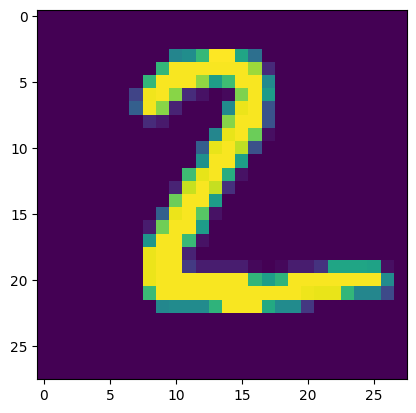

Test Label: 2
Test Predict Label: 2


In [33]:
# Checking the created labels and prediction of the model
plt.imshow(x_test_digits[1])
plt.show()
print('Test Label:', test_labels_relu_digits[1])
print('Test Predict Label:', test_predict_labels_relu_digits[1])

In [34]:
print(np.unique(test_labels_relu_digits))
print(np.unique(test_predict_labels_relu_digits))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [35]:
# Confusion Matrix
cf_matrix_relu_digits = confusion_matrix(test_labels_relu_digits, test_predict_labels_relu_digits)

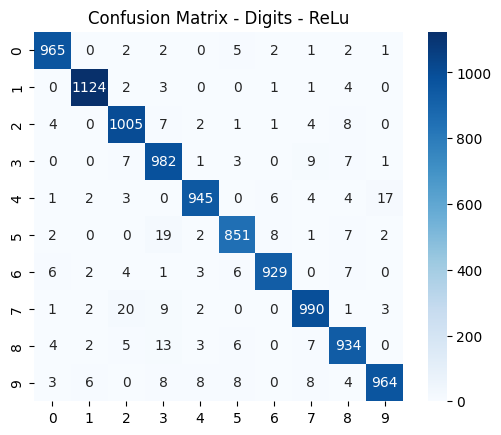

In [36]:
# Visualizing the confusion matrix
relu_digits_cfmatrix = plt.figure()
sns.heatmap(cf_matrix_relu_digits, cbar=True, square=True, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix - Digits - ReLu')
plt.show()
relu_digits_cfmatrix.savefig('/content/ReLu Confusion Matrix - Digits')

In [37]:
# Precision - False Positive
precision_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro') # Each class --> Average

0.9688853351173531

In [38]:
precision_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro') # As a whole

0.9689

In [39]:
# Precision - False Negative
recall_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro')

0.9684571597733594

In [40]:
recall_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro')

0.9689

In [41]:
# F1 Score - Harmonic Mean
f1_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro')

0.9686127474812185

In [42]:
f1_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro')

0.9689

## **Training the Model using CIFAR-10 Dataset**

**Building the Model/Shallow Neural Network - Grayscale Cifar - ReLu**

In [126]:
# Defining the no. of layers, neurons and activation function of each layer
model_relu_cifar = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(32,32,3)),
                              tf.keras.layers.Dense(1024, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(256, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [127]:
# Compiling the Model - Optimizer, Loss and Evaluation Metric
model_relu_cifar.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
)

In [128]:
# Training the Model - Cifar
history_relu_cifar = model_relu_cifar.fit(x_train_cifar, y_train_cifar, validation_split=0.1, epochs=20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 94s 66ms/step - accuracy: 0.2437 - loss: 2.1373 - val_accuracy: 0.3200 - val_loss: 1.8313
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 63ms/step - accuracy: 0.3572 - loss: 1.7892 - val_accuracy: 0.4016 - val_loss: 1.6824
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 145s 65ms/step - accuracy: 0.3883 - loss: 1.7089 - val_accuracy: 0.4148 - val_loss: 1.6306
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 144s 66ms/step - accuracy: 0.4026 - loss: 1.6655 - val_accuracy: 0.4342 - val_loss: 1.5987
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.4117 - loss: 1.6351 - val_accuracy: 0.4322 - val_loss: 1.5900
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 140s 65ms/step - accuracy: 0.4251 - loss: 1.6049 - val_accuracy: 0.4412 - val_loss: 1.5842
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 64ms/step - accuracy: 0.4331 - loss: 1.5820 - val_accuracy: 0.4420 - val_loss: 1.5419
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.4

**Evaluating the Model using Evaluation Metrics**

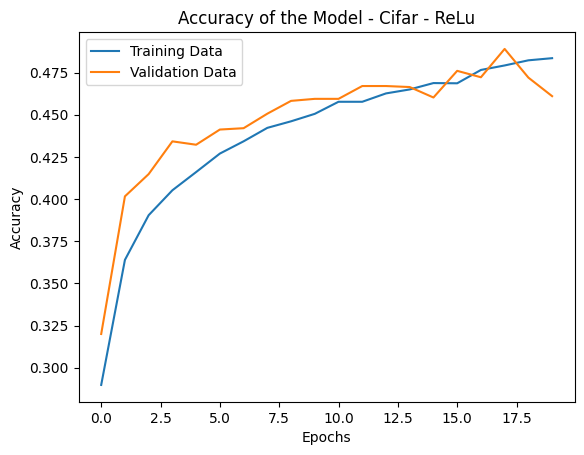

In [129]:
# Visualizing the Accuracies of the Model
relu_accuracy_cifar = plt.figure()
plt.plot(history_relu_cifar.history['accuracy'], label='Training Data')
plt.plot(history_relu_cifar.history['val_accuracy'], label='Validation Data')
plt.title('Accuracy of the Model - Cifar - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
relu_accuracy_cifar.savefig('/content/ReLu Accuracy Plot - Cifar.png')

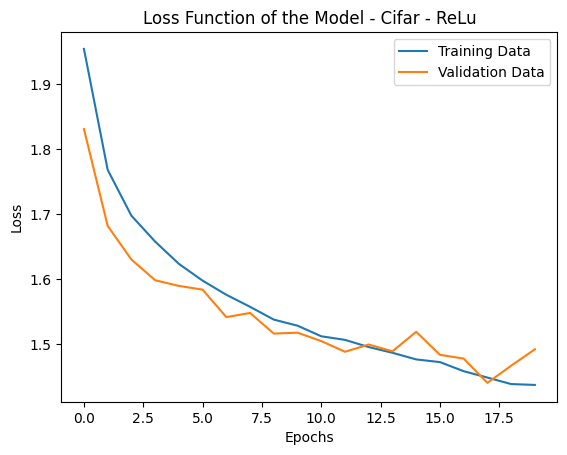

In [130]:
# Visualizing the Loss of the Model
relu_loss_cifar = plt.figure()
plt.plot(history_relu_cifar.history['loss'], label='Training Data')
plt.plot(history_relu_cifar.history['val_loss'], label='Validation Data')
plt.title('Loss Function of the Model - Cifar - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
relu_loss_cifar.savefig('/content/ReLu Loss Function Plot - Cifar.png')

In [131]:
# Evaluating the Model using Test Dataset
loss_relu_cifar, accuracy_relu_cifar = model_relu_cifar.evaluate(x_test_cifar, y_test_cifar)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4664 - loss: 1.4933


In [132]:
print(loss_relu_cifar)
print(accuracy_relu_cifar)

1.5030275583267212
0.46560001373291016


In [133]:
test_predict_relu_cifar = model_relu_cifar.predict(x_test_cifar)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [134]:
# Turning the encoded labels to labels 0-9
test_predict_labels_relu_cifar = [np.argmax(i) for i in test_predict_relu_cifar]
test_labels_relu_cifar = [np.argmax(i) for i in y_test_digits]

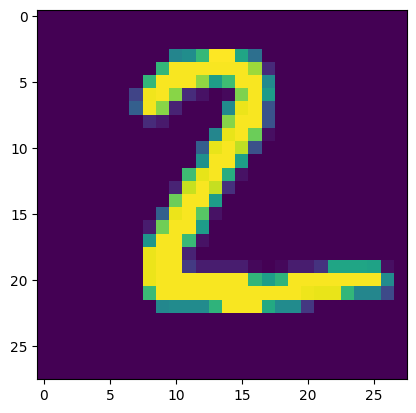

Test Label: 2
Test Predict Label: 9


In [135]:
# Checking the created labels and prediction of the model
plt.imshow(x_test_digits[1])
plt.show()
print('Test Label:', test_labels_relu_cifar[1])
print('Test Predict Label:', test_predict_labels_relu_cifar[1])

In [136]:
print(np.unique(test_labels_relu_cifar))
print(np.unique(test_predict_labels_relu_cifar))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [137]:
# Confusion Matrix
cf_matrix_relu_cifar = confusion_matrix(test_labels_relu_cifar, test_predict_labels_relu_cifar)

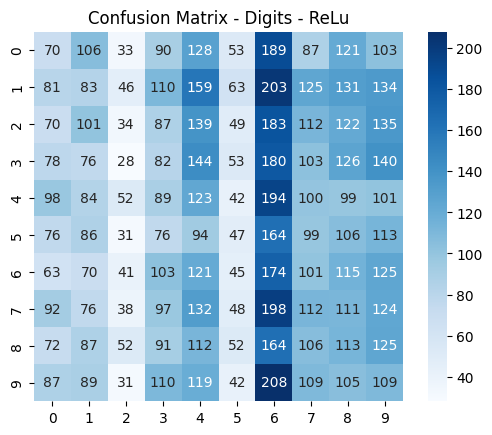

In [138]:
# Visualizing the confusion matrix
relu_cfmatrix_cifar = plt.figure()
sns.heatmap(cf_matrix_relu_cifar, cbar=True, square=True, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix - Digits - ReLu')
plt.show()
relu_cfmatrix_cifar.savefig('/content/ReLu Confusion Matrix - Cifar')

In [139]:
# Precision - False Positive
precision_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro') # Each class --> Average

0.09418462069050745

In [140]:
precision_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro') # As a whole

0.0947

In [141]:
# Precision - False Negative
recall_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro')

0.09512573316021398

In [142]:
recall_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro')

0.0947

In [143]:
# F1 Score - Harmonic Mean
f1_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro')

0.09077564836532123

In [144]:
f1_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro')

0.0947